<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/%22%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Хотим сделать линейную регрессию методом наименьших квадратов и град спуска

In [12]:
import numpy as np
import numpy.linalg 
import sklearn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

тут поигрался с шумом (noice)
наша цель: провести линию через точки

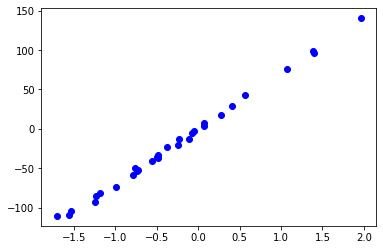

In [8]:
X, y = make_regression(n_samples=30, n_features=1, noise=3) # делает кастомный дата-сет
plt.plot(X, y, 'bo')

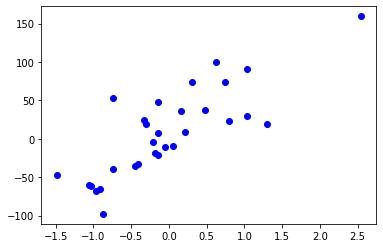

In [47]:
X, y = make_regression(n_samples=30, n_features=1, noise=40)
plt.plot(X, y, 'bo')

попробуем в лоб посчитать (сделаем так называемое анилитическое решение)

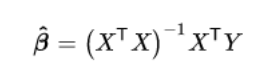

формула псевдообратной матрицы в помощь, по ней считаем наклон нашей прямой

In [48]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([54.84467591])

получили параметр, который как-то описывает нашу прямую
построим на графике эту пряму (вспоминаем уравнение прямой)

[48.37251442]


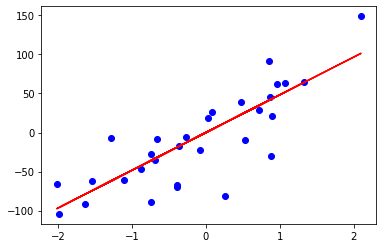

In [52]:
X, y = make_regression(n_samples=30, n_features=1, noise=40)
plt.plot(X, y, 'bo')
B = np.linalg.inv(X.T @ X) @ X.T @ y
print(B)
plt.plot(X, 0 + B * X, "r")

Ну вот так как-то, вроде похоже, теперь пропробуем сделать то же самое, но инструментами sklearn 

In [53]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #делаем экземпрляр класса Линейная регрессия
linreg. fit(X, y) #fit - обучить модель; predick - предсказать , ес инглиш мен

LinearRegression()

In [54]:
linreg.coef_

array([47.9286233])

Получили коэфициент оч похожий, на полученный в лоб
Для того чтобы найти начальную точку испльзуем linreg.intercept_ 
(уравнение прямой y = a*x + b, a - linreg.coef_, b - linreg.intercept_ )

In [55]:
linreg.intercept_ 

-3.7851912658579785

Идем дальше, смотрим такой пример

In [56]:
X = np.linspace(-10, 10, 30)
y = X ** 3

РИсуем

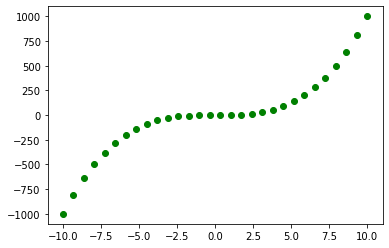

In [57]:
plt.plot(X, y, 'go')

Используем для нее нашу Лин. регресию и глядим на параметры

In [58]:
X.shape

(30,)

[64.04280618] 4.5464596547827e-14


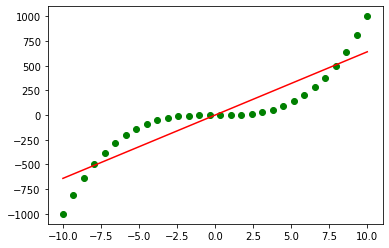

In [62]:
linreg = LinearRegression()
linreg.fit(X.reshape(-1, 1), y)
A = linreg.coef_
B = linreg.intercept_ 
print(A, B)
plt.plot(X, y, 'go')
plt.plot(X, B + A * X, "r")

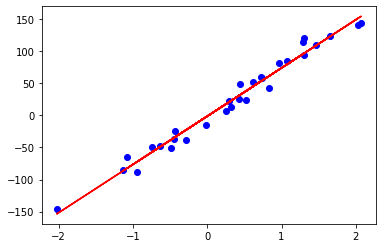

In [ ]:
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=30, n_features=1, noise=15)

plt.plot(X, y, 'bo')
k, b = np.polyfit(X.flatten(), y, deg=1)
plt.plot(X, k * X + b, 'r-')

In [ ]:
X = np.linspace(-10, 10, 20)
y = X ** 3 + 3 * X - 5

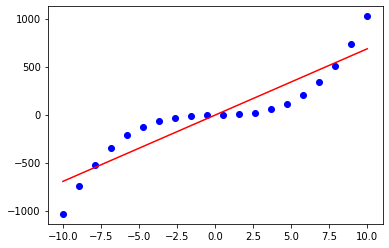

In [ ]:
plt.plot(X, y, 'bo')
k, b = np.polyfit(X.flatten(), y, deg=1)
plt.plot(X, k * X + b, 'r-')

У нас синусоида, как нам линейной функцией апроксимировать ее?
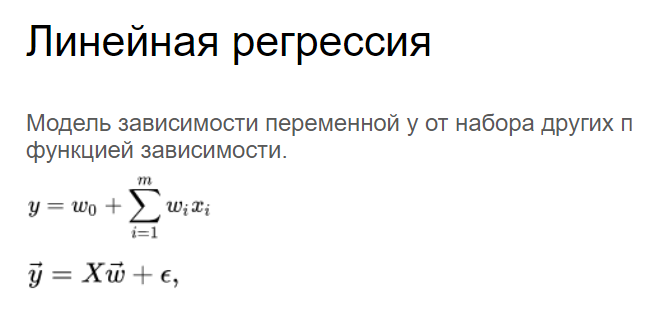

Надо указать разные веса перед каждым слагаемым, тогда их наклон будет разный ( тут опять смотрим уравнение прямой, ну и физ смысл производной)

Это будем называть фичами, представим их в виде полиномов

In [67]:
X = X.reshape(-1,1)
X.shape

(30, 1)

In [73]:
X_new = np.hstack((X , X ** 2)) 

A =  [6.40428062e+01 9.78541445e-16] B =  -5.0076506466791146e-14


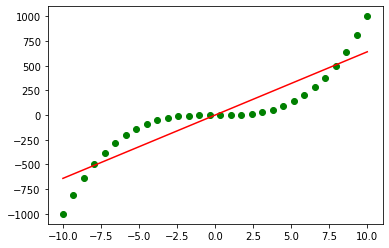

In [78]:
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 2 значения, потому, что это квадрат. Уравнение кривой теперь использавть будем
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2, "r")

Получили, что коэфициент перед квадратом оч маленький почти ноль, поэтому остается прямая

ИДЕМ ДАЛЬШЕ И ДЕЛАЕМ КУБ

In [80]:
X_new = np.hstack((X , X ** 2, X ** 3)) 
X_new.shape

(30, 3)

A =  [ 1.58248309e-14 -1.33226763e-15  1.00000000e+00] B =  4.747160519086872e-14


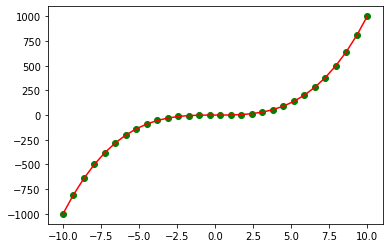

In [81]:
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 3 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2 + A[2] * X ** 3, "r")

ВАУ!!! какое попадание!
Ну а вообще было логитчно, что кубом такую кривую лучше апрксимировать (смотри график кубичской функции)

A =  [ 2.66401408e-14  2.22044605e-15  1.00000000e+00 -4.00203220e-17] B =  1.2206434453257304e-14


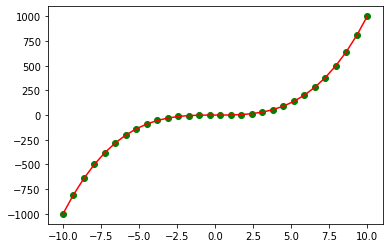

In [83]:
X_new = np.hstack((X , X ** 2, X ** 3, X ** 4)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 4 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2 + A[2] * X ** 3 +  A[3] * X ** 4, "r")

4-я степень такая-же (см фичи)

добавим шум в наши данные и вернемся к 2-й степени

A =  [[1.73859467e-15 1.00000000e+00]] B =  [225.75773344]


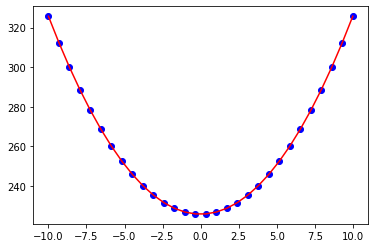

In [96]:
X = np.linspace(-10, 10, 30).reshape(-1,1)
y = X ** 2 + np.random.normal(scale = 500.0)
plt.plot(X, y, 'bo')

X_new = np.hstack((X , X ** 2)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)

A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

Какая красивая прарбола, хорошая апроксимация 

Смышленные заметыли, что мы дали шумовую константу по всем значениям - а это тупо ствиг и от отразился в В

Теперь сделаем норм искажение

A =  [[0.08542722 0.99147627]] B =  [-0.38546436]


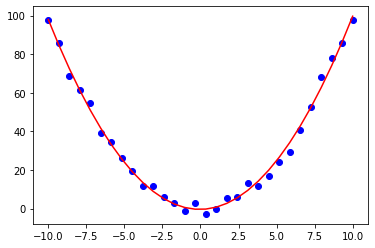

In [97]:
X = np.linspace(-10, 10, 30).reshape(-1,1)
y = X ** 2 + np.random.normal(scale = 3.0, size = (30, 1))
plt.plot(X, y, 'bo')

X_new = np.hstack((X , X ** 2)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)

A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

Видно, что апроксимация хорошая и что линейный член уже не равен нулю - это важно

**Немного о Машинном обучении**
1.   делаем датасет - данные , анализ, нормализация
2.   Деление датасета на тренировачный и тестовый
1.   Grid search, cross - validation
1.   Модель (Линейная Регрессия)
2.   Смотрим график Loss Function
6.   Оцениваем данные на тестовых моделях
7.   MSE, MAE - насколько у нас отклоняются предикшины на тестовой выборке от произвольной. Проблемы, когда Accuracy(оптимизация метрик), Precision, Recall - о них потом 







*Grid search*
Разные Гипер-параметры дают разный результат при одних и тех же входных данных, этот метод позволяет поглядеть на это дело

гиперпараметры не зависят от входных данных!!!!!

Рассмотрим пример трейн тест сплина

A =  [[0.1283018  0.99550381]] B =  [-0.29795989]


0.997601356122654

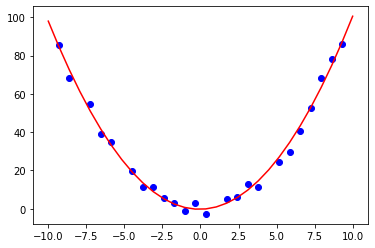

In [109]:
from sklearn.model_selection import train_test_split

X_new = np.hstack((X , X ** 2))
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
plt.plot(X_train[:,0], y_train, 'bo')

linreg = LinearRegression()
linreg.fit(X_train, y_train)
A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

linreg.score(X_test,y_test)

linreg.score - коэфициент корреляции

In [103]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(np.vstack((X, X ** 3)).T, y)

LinearRegression()

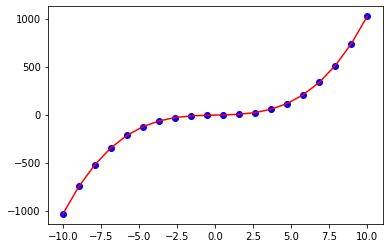

In [ ]:
plt.plot(X, y, 'bo')
plt.plot(X, linreg.coef_[0] * X + linreg.coef_[1] * X ** 3 + linreg.intercept_, 'r-')

$$ y = bias + w_1 * x_1 + w_2 * x_2 = bias + w_1 * x_1 + w_2 * {x_1}^2$$

In [ ]:
linreg.coef_, linreg.intercept_

(array([3., 1.]), -4.999999999999999)

**houses dataset**


In [ ]:
!wget -O houses_train.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
!wget -O houses_test.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv

--2023-01-19 16:47:45--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘houses_train.csv’

houses_train.csv    100%[===================>] 449.88K  --.-KB/s    in 0.006s  

2023-01-19 16:47:45 (74.2 MB/s) - ‘houses_train.csv’ saved [460676/460676]

--2023-01-19 16:47:45--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]

In [ ]:
import pandas as pd

columns = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'SalePrice']
df = pd.read_csv('houses_train.csv').set_index('Id')[columns]

In [ ]:
X = df.drop(columns=['SalePrice']).to_numpy()
y = df['SalePrice'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
mean_squared_error(linreg.predict(X_train), y_train)

2140672607.6538696

In [ ]:
linreg.coef_

array([ -8.85744163,  50.7605105 , 105.18039453,  66.65706195])

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_linreg = mean_squared_error(y_test, y_pred)
mae_linreg = mean_absolute_error(y_test, y_pred)

print("MSE: {}\n MAE: {}".format(mse_linreg, mae_linreg))

MSE: 2125411092.7866356
 MAE: 28916.51268089065


In [ ]:
2140672607.6538696
2125411092

In [ ]:
(np.ones_like(y_train) * y_train.mean()).shape

(1168,)

In [ ]:
y_mean = np.ones_like(y_test) * y_train.mean()

mse_mean = mean_squared_error(y_test, y_mean)
mae_mean = mean_absolute_error(y_test, y_mean)

print("MSE: {}\n MAE: {}".format(mse_mean, mae_mean))

MSE: 7677095207.783831
 MAE: 62575.926451960964


In [ ]:
y_median = np.ones_like(y_test) * np.median(y_train)

mse_median = mean_squared_error(y_test, y_median)
mae_median = mean_absolute_error(y_test, y_median)

print("MSE: {}\n MAE: {}".format(mse_median, mae_median))

MSE: 7861866593.5239725
 MAE: 59568.25


In [ ]:
linreg.coef_

array([ -8.85744163,  50.7605105 , 105.18039453,  66.65706195])

In [ ]:
len(df_train)

1460

In [ ]:
len(df_test)

1459